<div style="display: flex; align-items: flex-start;">
    <a href='' target='_blank'>
        <img src="https://media.istockphoto.com/id/1145371340/photo/partner-has-made-a-fraud-in-the-contract-of-sale-and-being-handed-a-cash-and-pen-to-the.jpg?s=612x612&w=0&k=20&c=gEL2GiGxVAWIg6zd73afHWjVE37cNEBww49DE45jwiI=" alt="Loan Prediction" style="border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);" width="600" height="500">
    </a>
    <div style="margin-left: 20px;">
        <p style="color: #B22222; font-size: 16px;"><strong>Project Objective:</strong> The objective of this project is to develop a predictive model that helps a financial institution identify customers who are less likely to default on a loan. The goal is to determine which customers are likely to repay their loans based on their financial and personal data.</p>

Exploratory Data Analysis (EDA): Analyzed missing values, inconsistencies, and patterns within the dataset.

Data Cleaning: Addressed missing values, corrected inconsistencies, and handled categorical variables by converting them into numerical representations.

Feature Engineering: Created new features and transformed existing ones (e.g., credit utilization) to improve model accuracy.

Feature Selection: Identified the most important features that influence the likelihood of loan repayment.

Modeling: Developed models using various classification algorithms including logistic regression, decision trees, random forests, and gradient boosting.

Model Evaluation: Evaluated models using metrics such as accuracy, precision, recall, and F1 score to select the best-performing model.

Hyperparameter Optimization: Improved model performance through techniques like Grid Search and Random Search to optimize hyperparameters.

<p style="color: green; text-align: center; margin-top: 20px;">
    Click on the image to access the data files and the project's Kaggle page.
</p>
    </div>
</div>


<p style="text-align: center;"><em>Libraries - Import Data - Exploratory Data Analyis</em></p>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('LoansTrainingSet.csv')

In [3]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


In [4]:
df.shape

(256984, 19)

In [5]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,2.569840e+05,195308.000000,1.953080e+05,256984.000000,116601.000000,256984.000000,256984.000000,2.569840e+05,256455.000000,256961.000000
mean,1.371331e+07,1251.116099,7.195272e+04,18.290195,34.881450,11.106267,0.156628,1.540656e+04,0.110316,0.027203
std,3.438131e+07,1762.016848,5.887757e+04,7.075747,21.854165,4.982982,0.460731,1.966506e+04,0.336229,0.245950
min,5.050000e+02,585.000000,0.000000e+00,3.400000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,8.299000e+03,714.000000,4.432100e+04,13.500000,16.000000,8.000000,0.000000,5.974000e+03,0.000000,0.000000
50%,1.429800e+04,733.000000,6.124200e+04,17.000000,32.000000,10.000000,0.000000,1.107800e+04,0.000000,0.000000
75%,2.436700e+04,744.000000,8.646200e+04,21.700000,51.000000,14.000000,0.000000,1.931900e+04,0.000000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,70.500000,176.000000,76.000000,11.000000,1.731412e+06,7.000000,11.000000


In [6]:
df['Purpose'].unique()

array(['Debt Consolidation', 'other', 'Business Loan',
       'Home Improvements', 'Buy House', 'Other', 'Buy a Car',
       'Medical Bills', 'Take a Trip', 'Educational Expenses'],
      dtype=object)

In [7]:
df.corr(numeric_only=True)

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
Current Loan Amount,1.000000,-0.139743,0.024069,0.014725,0.003488,-0.003094,-0.000062,0.003138,0.003576,-0.003069
Credit Score,-0.139743,1.000000,-0.033221,-0.011658,-0.007994,0.008124,0.000777,-0.003263,-0.003426,0.004381
Annual Income,0.024069,-0.033221,1.000000,0.146859,-0.059675,0.140463,-0.013672,0.292165,-0.044837,0.038185
Years of Credit History,0.014725,-0.011658,0.146859,1.000000,-0.039695,0.128033,0.061251,0.201001,0.062049,0.020915
Months since last delinquent,0.003488,-0.007994,-0.059675,-0.039695,1.000000,-0.035803,0.088612,-0.024292,0.112907,0.002730
Number of Open Accounts,-0.003094,0.008124,0.140463,0.128033,-0.035803,1.000000,-0.013731,0.222763,-0.022805,0.005754
Number of Credit Problems,-0.000062,0.000777,-0.013672,0.061251,0.088612,-0.013731,1.000000,-0.103814,0.755866,0.584917
Current Credit Balance,0.003138,-0.003263,0.292165,0.201001,-0.024292,0.222763,-0.103814,1.000000,-0.117995,-0.011118
Bankruptcies,0.003576,-0.003426,-0.044837,0.062049,0.112907,-0.022805,0.755866,-0.117995,1.000000,0.046160
Tax Liens,-0.003069,0.004381,0.038185,0.020915,0.002730,0.005754,0.584917,-0.011118,0.046160,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  object 
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  195308 non-null  float64
 6   Years in current job          245508 non-null  object 
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 195308 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  object 
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  116601 non-nul

In [9]:
df.apply(pd.Series.nunique)

Loan ID                         215700
Customer ID                     215700
Loan Status                          2
Current Loan Amount              27347
Term                                 2
Credit Score                       334
Years in current job                11
Home Ownership                       4
Annual Income                    60558
Purpose                             10
Monthly Debt                    129115
Years of Credit History            541
Months since last delinquent       131
Number of Open Accounts             59
Number of Credit Problems           12
Current Credit Balance           45704
Maximum Open Credit              87188
Bankruptcies                         8
Tax Liens                           12
dtype: int64

In [10]:
df["Years in current job"].value_counts()

Years in current job
10+ years    78896
2 years      23462
< 1 year     21012
3 years      20659
5 years      17864
1 year       16746
4 years      16166
6 years      14597
7 years      13968
8 years      12206
9 years       9932
Name: count, dtype: int64

In [11]:
df[df.duplicated()].shape[0]

16610

In [12]:
df.shape

(256984, 19)

<p style="text-align: center;"><em>Feature Engineering</em></p>

In [13]:
df = df.drop_duplicates()

In [14]:
df['Credit Score'] = df['Credit Score'].fillna(df['Credit Score'].median())
df['Annual Income'] = df['Annual Income'].fillna(df['Annual Income'].median())
df['Months since last delinquent'] = df['Months since last delinquent'].fillna(0)
df['Tax Liens'] = df['Tax Liens'].fillna(0)
df['Bankruptcies'] = df['Bankruptcies'].fillna(0)


In [15]:
df['Years in current job'] = df["Years in current job"].fillna(df['Years in current job'].mode()[0])
df=df[df['Maximum Open Credit'] !='#VALUE!']
df['Maximum Open Credit'] = df['Maximum Open Credit'].fillna(df['Credit Score'].mean())

In [16]:
df['Years in current job']=df['Years in current job'].str.replace('years','').str.replace('year','').str.replace('+','').str.replace('< ','')
df['Monthly Debt']=df['Monthly Debt'].str.replace('$','').str.replace(',','')
df['Monthly Debt']=df['Monthly Debt'].astype(float)
df['Loan Status'] = df['Loan Status'].replace({'Charged Off': '0', 'Fully Paid': '1'})
df['Monthly Debt']=df['Monthly Debt']

In [17]:
df['Years in current job']=df['Years in current job'].astype(int)
df['Monthly Debt']=df['Monthly Debt'].astype(float)
df['Maximum Open Credit']=df['Maximum Open Credit'].astype(int)

In [18]:
df.apply(pd.Series.nunique)

Loan ID                         215698
Customer ID                     215698
Loan Status                          2
Current Loan Amount              27347
Term                                 2
Credit Score                       334
Years in current job                10
Home Ownership                       4
Annual Income                    60559
Purpose                             10
Monthly Debt                    129115
Years of Credit History            541
Months since last delinquent       131
Number of Open Accounts             59
Number of Credit Problems           12
Current Credit Balance           45704
Maximum Open Credit              68986
Bankruptcies                         8
Tax Liens                           12
dtype: int64

In [19]:
for column_name in df.select_dtypes(include=['object']).columns:
    unique_values = df[column_name].unique()
    print(f"Unique values in '{column_name}': {unique_values}")

Unique values in 'Loan ID': ['000025bb-5694-4cff-b17d-192b1a98ba44'
 '00002c49-3a29-4bd4-8f67-c8f8fbc1048c'
 '00002d89-27f3-409b-aa76-90834f359a65' ...
 'ffffca93-aa8c-4123-b8ff-7852f6df889a'
 'ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe'
 'ffffe32e-ed17-459f-9cfd-7b9ee7972933']
Unique values in 'Customer ID': ['5ebc8bb1-5eb9-4404-b11b-a6eebc401a19'
 '927b388d-2e01-423f-a8dc-f7e42d668f46'
 'defce609-c631-447d-aad6-1270615e89c4' ...
 '616fef0c-8f09-4327-9b5c-48fcfaa52934'
 '971a6682-183b-4a52-8bce-1d3429ade295'
 '97281336-1e45-41d2-acb2-263ce56a590e']
Unique values in 'Loan Status': ['1' '0']
Unique values in 'Term': ['Short Term' 'Long Term']
Unique values in 'Home Ownership': ['Home Mortgage' 'Own Home' 'Rent' 'HaveMortgage']
Unique values in 'Purpose': ['Debt Consolidation' 'other' 'Business Loan' 'Home Improvements'
 'Buy House' 'Other' 'Buy a Car' 'Medical Bills' 'Take a Trip'
 'Educational Expenses']


In [20]:
df=df.drop(['Loan ID', 'Customer ID', 'Credit Score'], axis=1)


In [21]:
x=df.drop('Loan Status', axis=1)
y=df['Loan Status']

In [22]:
x=pd.get_dummies(x,drop_first=True)

In [23]:
x.shape

(240370, 25)

<p style="text-align: center;"><em>Modelling</em></p>

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [25]:
g=GaussianNB()
b=BernoulliNB()
rf=RandomForestClassifier()
gr=GradientBoostingClassifier()

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [27]:
g.fit(x_train,y_train)

GaussianNB()

In [28]:
gtahmin=g.predict(x_test)

In [29]:
accuracy_score(gtahmin,y_test)

0.4188750676041103

In [30]:
confusion_matrix(gtahmin,y_test)

array([[12795, 27855],
       [   82,  7342]])

In [31]:
gtahmin=g.predict(x_test)

<Axes: >

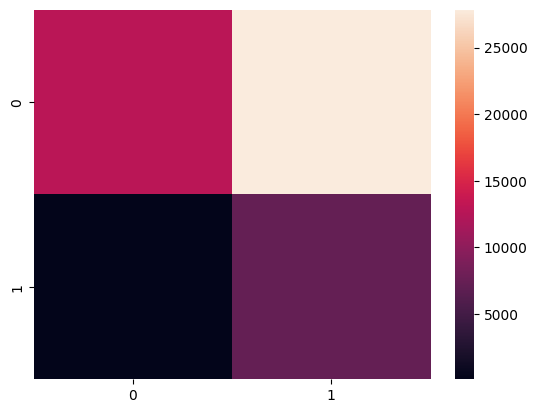

In [32]:
sns.heatmap(confusion_matrix(gtahmin,y_test))

In [33]:
print(classification_report(gtahmin,y_test))

              precision    recall  f1-score   support

           0       0.99      0.31      0.48     40650
           1       0.21      0.99      0.34      7424

    accuracy                           0.42     48074
   macro avg       0.60      0.65      0.41     48074
weighted avg       0.87      0.42      0.46     48074



In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

def model_classification(x, y):
    '''
    x: independent variables (features)
    y: dependent variable (target)
    return best model and its accuracy
    '''
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    
    models = [
        GaussianNB(),
        BernoulliNB(),
        LogisticRegression(max_iter=1000),
        RandomForestClassifier(random_state=42),
        GradientBoostingClassifier(random_state=42),
        KNeighborsClassifier(n_neighbors=5)
    ]
    
    results = []
    
    for model in models:
        model.fit(x_train, y_train)
        model_predict = model.predict(x_test)
        accuracy = accuracy_score(y_test, model_predict)
        confusion_mat = confusion_matrix(y_test, model_predict)
        print(f"Model: {model.__class__.__name__}")
        print(f"Model Accuracy: {accuracy:.4f}")
        print("Model Confusion Matrix:\n", confusion_mat)
        print("Model Classification Report:\n", classification_report(y_test, model_predict))
        print("-" * 50)
        results.append((model, accuracy))
    
    # En iyi modeli seç
    best_model, best_accuracy = max(results, key=lambda item: item[1])
    
    return best_model, best_accuracy

# Model fonksiyonunu çalıştır ve çıktıyı yazdır
best_model, best_accuracy = model_classification(x, y)
print(f"Best Model: {best_model.__class__.__name__}")
print(f"Best Model Accuracy: {best_accuracy:.4f}")


Model: GaussianNB
Model Accuracy: 0.4191
Model Confusion Matrix:
 [[19240   119]
 [41773 10979]]
Model Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.99      0.48     19359
           1       0.99      0.21      0.34     52752

    accuracy                           0.42     72111
   macro avg       0.65      0.60      0.41     72111
weighted avg       0.81      0.42      0.38     72111

--------------------------------------------------
Model: BernoulliNB
Model Accuracy: 0.7312
Model Confusion Matrix:
 [[  230 19129]
 [  251 52501]]
Model Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.01      0.02     19359
           1       0.73      1.00      0.84     52752

    accuracy                           0.73     72111
   macro avg       0.61      0.50      0.43     72111
weighted avg       0.66      0.73      0.62     72111

----------------------------------------